# Digit Recognition with CNN

Reference
<br>
https://pinkwink.kr/1121
<br>
http://adventuresinmachinelearning.com/keras-tutorial-cnn-11-lines/
<br>
<br>
Structure of convolutional neural network(CNN)
<br>
<img src=https://i0.wp.com/adventuresinmachinelearning.com/wp-content/uploads/2017/04/CNN-example-block-diagram.jpg>
<br>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import tensorflow, keras, numpy
import sys
import tensorflow.compat.v1 as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

Using TensorFlow backend.


In [0]:
# # check version
# print('Python version : ', sys.version)
# print('TensorFlow version : ', tf.__version__)
# print('Keras version : ', keras.__version__)

In [3]:
# image size
img_rows = 28
img_cols = 28

# load data from keras mnist datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# reshape datas
input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# change type to floating point
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# # check data info
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

In [5]:
# init model
model = Sequential()

# layer 1
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# layer 2
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# flatten layer 1
model.add(Flatten())
# layer 2
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(num_classes, activation='softmax'))

# see model info
model.summary()



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
___

In [0]:
# # see structure of CNN model
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
# %matplotlib inline

# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [7]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# train
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 239us/step - loss: 0.1887 - acc: 0.9407 - val_loss: 0.0526 - val_acc: 0.9829
Epoch 2/12
60000/60000 [==============================] - 7s 122us/step - loss: 0.0621 - acc: 0.9810 - val_loss: 0.0345 - val_acc: 0.9876
Epoch 3/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.0463 - acc: 0.9857 - val_loss: 0.0279 - val_acc: 0.9905
Epoch 4/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.0369 - acc: 0.9881 - val_loss: 0.0300 - val_acc: 0.9904
Epoch 5/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.0314 - acc: 0.9902 - val_loss: 0.0236 - val_acc: 0.9912
Epoch 6/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.0278 - acc: 0.9909 - val_loss: 0.0235 - val_acc: 0.9923
Epoch 7/12
60000/60000 [==

Now model is ready.
<br>
Training is done.
<br>

In [8]:
# see test result
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02743528986521483
Test accuracy: 0.9926


In [0]:
# save model as file
model.save('DigitRecognitionCNN.h5')

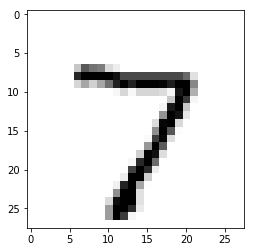

The Answer is  [7]


In [9]:
# matplotlib for see choosen image
import matplotlib.pyplot as plt

# choose image and show
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.xticks([]) # hide x axis
# plt.yticks([]) # hide y axis
plt.show()

# reshape choosen image and predict with trained model
print('The Answer is ', model.predict_classes(x_test[n].reshape((1, 28, 28, 1))))

In [0]:
'''
choose random loss images and show prediction error
'''
import random

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()